## **Preprocessing:**

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/FreeLance_Projects/test embauche/TEST-DATASCIENTIST/PROBLEM2/train.csv")
test = pd.read_csv("/content/drive/MyDrive/FreeLance_Projects/test embauche/TEST-DATASCIENTIST/PROBLEM2/test.csv")

In [ ]:
train.head()

,Unnamed: 0,sentence,label
0,0,"TTC 640,00","640,00"
1,1,"TOTAL A PAYEE 640,00 sad","640,00"
2,2,"Total 130,00 MAD","130,00"
3,3,"Sous Total 108,33 MAD TVA 21,67 MAD Total 130...","130,00"
4,4,"TOTAL FACTURE EN DIRHAMS TTC 350,00","350,00"


In [ ]:
# Tokenization:
train['sentence'] = [word_tokenize(comment) for comment in train['sentence']]
test['sentence'] = [word_tokenize(comment) for comment in test['sentence']]

In [ ]:
# Here, we range sentences by words and separate between them using <SENT_DELIMITER>
def range_sent(data_frame):
  sent_list = [] # This list will recieve all the sentences.
  label_ttc = []
  for i in range(len(data_frame['sentence'])):
      for j in range(len(data_frame['sentence'][i])):
          sent_list.append(data_frame['sentence'][i][j].lower())
          label_ttc.append(data_frame['label'][i])
      sent_list.append("<SENT_DELIMITER>")
      label_ttc.append("<SENT_DELIMITER>")     
    


  data = list(zip(sent_list,label_ttc))
  data_df = pd.DataFrame(data, columns=['word','label_ttc'])

  return data_df

train = range_sent(train)
test = range_sent(test)

In [ ]:
train.head(10)

,word,label_ttc
0,ttc,"640,00"
1,"640,00","640,00"
2,<SENT_DELIMITER>,<SENT_DELIMITER>
3,total,"640,00"
4,a,"640,00"
5,payee,"640,00"
6,"640,00","640,00"
7,sad,"640,00"
8,<SENT_DELIMITER>,<SENT_DELIMITER>
9,total,"130,00"


In [ ]:
def form_data(data_frame):
  for i in range(len(data_frame)):
    if data_frame["label_ttc"][i] == data_frame["word"][i]:
      data_frame["label_ttc"][i] = "TTC"
    else:
      data_frame["label_ttc"][i] = "O"
  return data_frame

train_data = form_data(train)
test_data = form_data(test)

In [ ]:
train_data

,word,label_ttc
0,ttc,O
1,"640,00",TTC
2,<SENT_DELIMITER>,TTC
3,total,O
4,a,O
...,...,...
1953,a,O
1954,payee,O
1955,"350,001",O
1956,au,O


In [ ]:
# Adding Sentence tags:
def add_sent_tags(data_frame):
  data_frame["sentence"]=np.nan

  delimiter = "<SENT_DELIMITER>"
  s=1
  for i in range(len(data_frame["word"])):
      if data_frame["word"][i] != delimiter:
          data_frame["sentence"][i]="sentence_"+str(s)
      else:
          data_frame["sentence"][i]="sentence_"+str(s)
          s=s+1
  data_frame.drop(data_frame[data_frame.word == "<SENT_DELIMITER>"].index, inplace=True)
  data_frame = data_frame.reset_index(drop=True)
  return data_frame

train_data = add_sent_tags(train_data)
test_data = add_sent_tags(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
train_data

,word,label_ttc,sentence
0,ttc,O,sentence_1
1,"640,00",TTC,sentence_1
2,total,O,sentence_2
3,a,O,sentence_2
4,payee,O,sentence_2
...,...,...,...
1611,total,O,sentence_342
1612,a,O,sentence_342
1613,payee,O,sentence_342
1614,"350,001",O,sentence_342


In [ ]:
train_data.to_csv("/content/drive/MyDrive/FreeLance_Projects/test embauche/TEST-DATASCIENTIST/PROBLEM2/train_data.csv")
test_data.to_csv("/content/drive/MyDrive/FreeLance_Projects/test embauche/TEST-DATASCIENTIST/PROBLEM2/test_data.csv")

### **Model and Feature Engineering:**

In [1]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-6q0tvupu
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-6q0tvupu
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101078 sha256=60fa1238fb6ef3e87a9391d51efc56ab230090fa8196bb1ef7f96fa1918cc266
  Stored in directory: /tmp/pip-ephem-wheel-cache-x__mpqcw/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [2]:
#Importing Libraries for: 
################################################################################

#Numurical Calculations and Data Presentation:
import pandas as pd
import numpy as np

#For Zeros Initializations:
from numpy import zeros

#For converting a given input to an array:
from numpy import asarray

#For Graph Ploting:
import matplotlib.pyplot as plt

#For Neural Nets Definition and Use:
import keras
import tensorflow as tf

#For Padding Sequences:
from keras.preprocessing.sequence import pad_sequences

#For Splitting Data:
from sklearn.model_selection import train_test_split

#For Layers Definition:
from keras.models import Sequential
from keras.layers import Flatten
from future.utils import iteritems
from tensorflow.keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Conv1D
from keras.layers import  concatenate, SpatialDropout1D, GlobalMaxPooling1D, Activation, RepeatVector, Permute, Multiply, Lambda
from keras_contrib.layers import CRF
from keras import backend as K
#For model saving and loading:
import pickle

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/FreeLance_Projects/test embauche/TEST-DATASCIENTIST/PROBLEM2/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/FreeLance_Projects/test embauche/TEST-DATASCIENTIST/PROBLEM2/test_data.csv")
train_data.head()

,Unnamed: 0,word,label_ttc,sentence
0,0,ttc,O,sentence_1
1,1,"640,00",TTC,sentence_1
2,2,total,O,sentence_2
3,3,a,O,sentence_2
4,4,payee,O,sentence_2


In [4]:
train_data = train_data[['sentence', "word","label_ttc"]]
test_data = test_data[['sentence', "word", "label_ttc"]]

In [5]:
train_data.tail()

,sentence,word,label_ttc
1611,sentence_342,total,O
1612,sentence_342,a,O
1613,sentence_342,payee,O
1614,sentence_342,"350,001",O
1615,sentence_342,au,O


In [6]:
# We start by building the words vocabulary:
words_train = list(set(train_data["word"].values))
words_test = list(set(test_data["word"].values))
words = words_train + words_test

words.append("UNK") # we add "UNK" and "ENDPAD" tokens to the vocabulary in order to use them later
words.append("ENDPAD")

n_words = len(words)
print("The size of the word vocabulary is: "+ str(n_words))

The size of the word vocabulary is: 390


In [7]:
# Then building the Characters vocabulary:
chars = set([w_i for w in words for w_i in w])

n_chars = len(chars)
print("The size of the character vocabulary is: "+ str(n_chars))

The size of the character vocabulary is: 52


In [8]:
# Then building the BIO_tags vocabulary:
tags = list(set(train_data["label_ttc"].values))

n_tags = len(tags)
print("The number of label_ttc is: " + str(n_tags))

The number of label_ttc is: 2


In [9]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["label_ttc"].values.tolist())]
        self.grouped = self.data.groupby("sentence",sort=False).apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["sentence_{}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [10]:
getter = SentenceGetter(train_data)
sentences_train = getter.sentences

getter = SentenceGetter(test_data)
sentences_test = getter.sentences

sentences = sentences_train + sentences_test

In [11]:
print(sentences[113])

[('total', 'O'), ('facture', 'O'), ('416,00', 'TTC')]


In [12]:
print("The number of sentences is: " + str(len(sentences)))

The number of sentences is: 429


In [13]:
max_len=max([len(s) for s in sentences])
print("The longest sentence have a size of: " + str(max_len))

The longest sentence have a size of: 14


In [14]:
# Check how long sentences are so that we can pad them
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

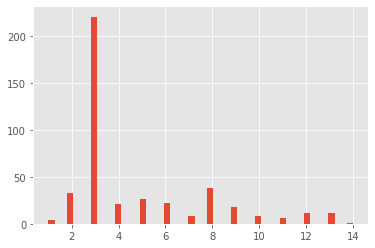

In [15]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [16]:
# Words dictionary that maps each word to an integer:
word2idx = {w: i for i, w in enumerate(words)}

# Characters dictionary that maps each Character to an integer:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

# BIO tags dictionary that maps each BIO tag to an integer:
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [17]:
# Build word input data in a form of list of sentences:
X_word_train = [[word2idx[w[0]] for w in s] for s in sentences_train]
X_word_test = [[word2idx[w[0]] for w in s] for s in sentences_test]

# Padding the sentences by adding the same integer to all sentences in order to make them all equal in term of length:
X_word_train = pad_sequences(maxlen=max_len, sequences=X_word_train, padding="post", value=n_words - 1)
X_word_test = pad_sequences(maxlen=max_len, sequences=X_word_test, padding="post", value=n_words - 1)

In [18]:
print("the shape of the word input data is: " + str(X_word_train.shape))
print("the shape of the word input data is: " + str(X_word_test.shape))

the shape of the word input data is: (342, 14)
the shape of the word input data is: (87, 14)


In [19]:
# The longest word in term of characters vocabulary:
max_len_char=max([len(w) for w in words])
print("The longest word have a size of: " + str(max_len_char))

The longest word have a size of: 11


In [20]:
# Building and padding character input data in a form of list of sentences:
X_char_train = []
for sentence in sentences_train:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char_train.append(np.array(sent_seq))


X_char_test = []
for sentence in sentences_test:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char_test.append(np.array(sent_seq))

In [21]:
print("the shape of the X_char input data is: " +"("+ str(len(X_char_train)) +","+ str(len(X_char_train[0])) +")")

the shape of the X_char input data is: (342,14)


In [22]:
# Build BIO_tag output data in a form of list of sentences:
y_train = [[tag2idx[w[1]] for w in s] for s in sentences_train]
y_test = [[tag2idx[w[1]] for w in s] for s in sentences_test]

# Padding the sentences by adding the same integer to all sentences in order to make them all equal in term of length:
y_train = pad_sequences(maxlen=max_len, sequences=y_train, padding="post", value=tag2idx["O"])
y_test = pad_sequences(maxlen=max_len, sequences=y_test, padding="post", value=tag2idx["O"])

# Encode the y data using one-hot encoding:
y_train = [to_categorical(i, num_classes=n_tags) for i in y_train]
y_test = [to_categorical(i, num_classes=n_tags) for i in y_test]

In [23]:
print("the shape of the BIO_tag input data is: " + str(len(y_train)))

the shape of the BIO_tag input data is: 342


### **Word Embedding:**


In [24]:
# import gensim
# from gensim.models import Word2Vec
# # load model
# model = Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/MDA NER/Word Embedding Generation/Word2Vec/Skipgram_model/Skipgram_model.bin')
# print(model)

In [25]:
# def getList(dict): 
#     list = [] 
#     for key in dict.keys(): 
#         list.append(key) 
          
#     return list

# vocabulary = getList(model.wv.vocab)

In [26]:
# Word2Vec_dict = {}
# for element in vocabulary:
#     Word2Vec_dict[element] = model.wv[element].tolist()

In [27]:
# # Load the whole embedding into memory
# embeddings_index = dict()
# for key, value in Word2Vec_dict.items():
# 	word = key
# 	coefs = value
# 	embeddings_index[word] = coefs
# print('Loaded %s word vectors.' % len(embeddings_index))

Now we have built a dictionary that contains 486194 word vector, and 300 as a vector length.

Next, we will build a matrix that contains the training vocabulary with their equivalent vectors.
This matrix will be given to the embedding layer to take it as weights, so if any cobinasion of words comes in the future as an input, the embedding layer will be able to represent it as a word2vec vectorization format.

In [28]:
# # We need to know the words intersection between the vocab we have and the the vocab of the embeddings:
# keys_a = set(word2idx.keys())
# keys_b = set(embeddings_index.keys())
# intersection = keys_a & keys_b

In [29]:
# len(intersection)

In [30]:
# # create a weighted matrix for words in training docs
# word_embedding_matrix = zeros((n_words, 100))
# for word, i in word2idx.items():
# 	embedding_vector = embeddings_index.get(word)
# 	if embedding_vector is not None:
# 		word_embedding_matrix[i] = embedding_vector

In [31]:
# word_embedding_matrix.shape

### **Data Statistics:**

In [32]:
# print("The data vocabulary size: ", len(keys_a))
# print("The embedding data vocabulary size: ", len(keys_b))
# print("The percentage of embedding cover: ", (len(intersection)/len(keys_a))*100,"%")

###**Building The Neural Networks:**
<p>We start by defining the optimizer we will use to optimize the performance of the model while training</p>

In [33]:
# Defining the learning rate:
learning_rate = 0.0001

# Defining the Adam optimizer:
opt_name = "Adam"
opt=tf.keras.optimizers.Adam(
    learning_rate,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name=opt_name)

In [34]:
! pip install seqeval

     |████████████████████████████████| 51kB 3.2MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16184 sha256=f05fc783fd771f92a4b6a2a47e8fea96cdb2a656b5eab435da4c6f89f3077f72
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [36]:
#------------------------- input and embedding for words: ----------------------
word_in = Input(shape=(max_len,))

emb_word = Embedding(input_dim=n_words,
                     output_dim=100,
                     embeddings_initializer="GlorotUniform",
                     input_length=max_len,
                     trainable=True)(word_in)

#---------------------- input and embedding for characters: --------------------
char_in = Input(shape=(max_len, max_len_char,))

emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=True))(char_in)

# character LSTM to get word encodings by characters
char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.5))(emb_char)

#----------------------------- Spacial Drop Out: -------------------------------
# Spacial drop_out parameter:
spacial_drop_out = 0.2

# Spacial drop_out layer:
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(spacial_drop_out)(x)

# -----------------------------1st LSTM Layer: ---------------------------------
# lstm_1 parameters: 
lstm_1_num_units = 180
lstm_1_activation = "tanh"
lstm_1_dropout=0.2
lstm_1_rec_activation = "sigmoid"
lstm_1_rec_dropout=0.2

# lstm_1 layer:
lstm_1 = Bidirectional(LSTM(units=lstm_1_num_units,
                             activation=lstm_1_activation,
                             recurrent_activation=lstm_1_rec_activation,
                             use_bias=True,
                             kernel_initializer="glorot_uniform",
                             recurrent_initializer="orthogonal",
                             bias_initializer="zeros",
                             unit_forget_bias=True,
                             kernel_regularizer=None,
                             recurrent_regularizer=None,
                             bias_regularizer=None,
                             activity_regularizer=None,
                             kernel_constraint=None,
                             recurrent_constraint=None,
                             bias_constraint=None,
                             dropout=lstm_1_dropout,
                             recurrent_dropout=lstm_1_rec_dropout,
                             implementation=2,
                             return_sequences=True,
                             return_state=False,
                             go_backwards=False,
                             stateful=False))(x)

# #----------------------------- 2nd LSTM Layer: ---------------------------------
# lstm_2 parameters: 
lstm_2_num_units = 180
lstm_2_activation = "tanh"
lstm_2_dropout=0.2
lstm_2_rec_activation = "sigmoid"
lstm_2_rec_dropout=0.2

# lstm_2 layer:
lstm_2 = Bidirectional(LSTM(units=lstm_2_num_units,
                             activation=lstm_2_activation,
                             recurrent_activation=lstm_2_rec_activation,
                             use_bias=True,
                             kernel_initializer="glorot_uniform",
                             recurrent_initializer="orthogonal",
                             bias_initializer="zeros",
                             unit_forget_bias=True,
                             kernel_regularizer=None,
                             recurrent_regularizer=None,
                             bias_regularizer=None,
                             activity_regularizer=None,
                             kernel_constraint=None,
                             recurrent_constraint=None,
                             bias_constraint=None,
                             dropout=lstm_2_dropout,
                             recurrent_dropout=lstm_2_rec_dropout,
                             implementation=2,
                             return_sequences=True,
                             return_state=False,
                             go_backwards=False,
                             stateful=False))(lstm_1)   

#----------------------------- Attention Layer: --------------------------------
# compute importance for each step
attention = Dense(units=1, activation='tanh')(lstm_2) 
attention = Lambda(lambda xin: K.sum(xin, axis=1))(attention)
attention = Activation('softmax')(attention)
attention = RepeatVector(lstm_2_num_units*2)(attention)
attention = Permute([2, 1])(attention)

# apply the attention
sent_representation = Multiply()([lstm_2, attention])
# sent_representation = Lambda(lambda xin: K.sum(xin, axis=1))(sent_representation)

#----------------------------- TimeDist Layer: ---------------------------------
out = TimeDistributed(Dense(units=n_tags,
                                activation="softmax", 
                                use_bias=True,
                                kernel_initializer="glorot_uniform",
                                bias_initializer="zeros",
                                kernel_regularizer=None,
                                bias_regularizer=None,
                                activity_regularizer=None,
                                kernel_constraint=None,
                                bias_constraint=None))(sent_representation)

#----------------------------- OutPut Layer: -----------------------------------
model = Model(inputs=[word_in, char_in], outputs=out)

#----------------------------- Model Compile: ----------------------------------
loss="categorical_crossentropy"
model.compile(optimizer=opt, loss= loss )

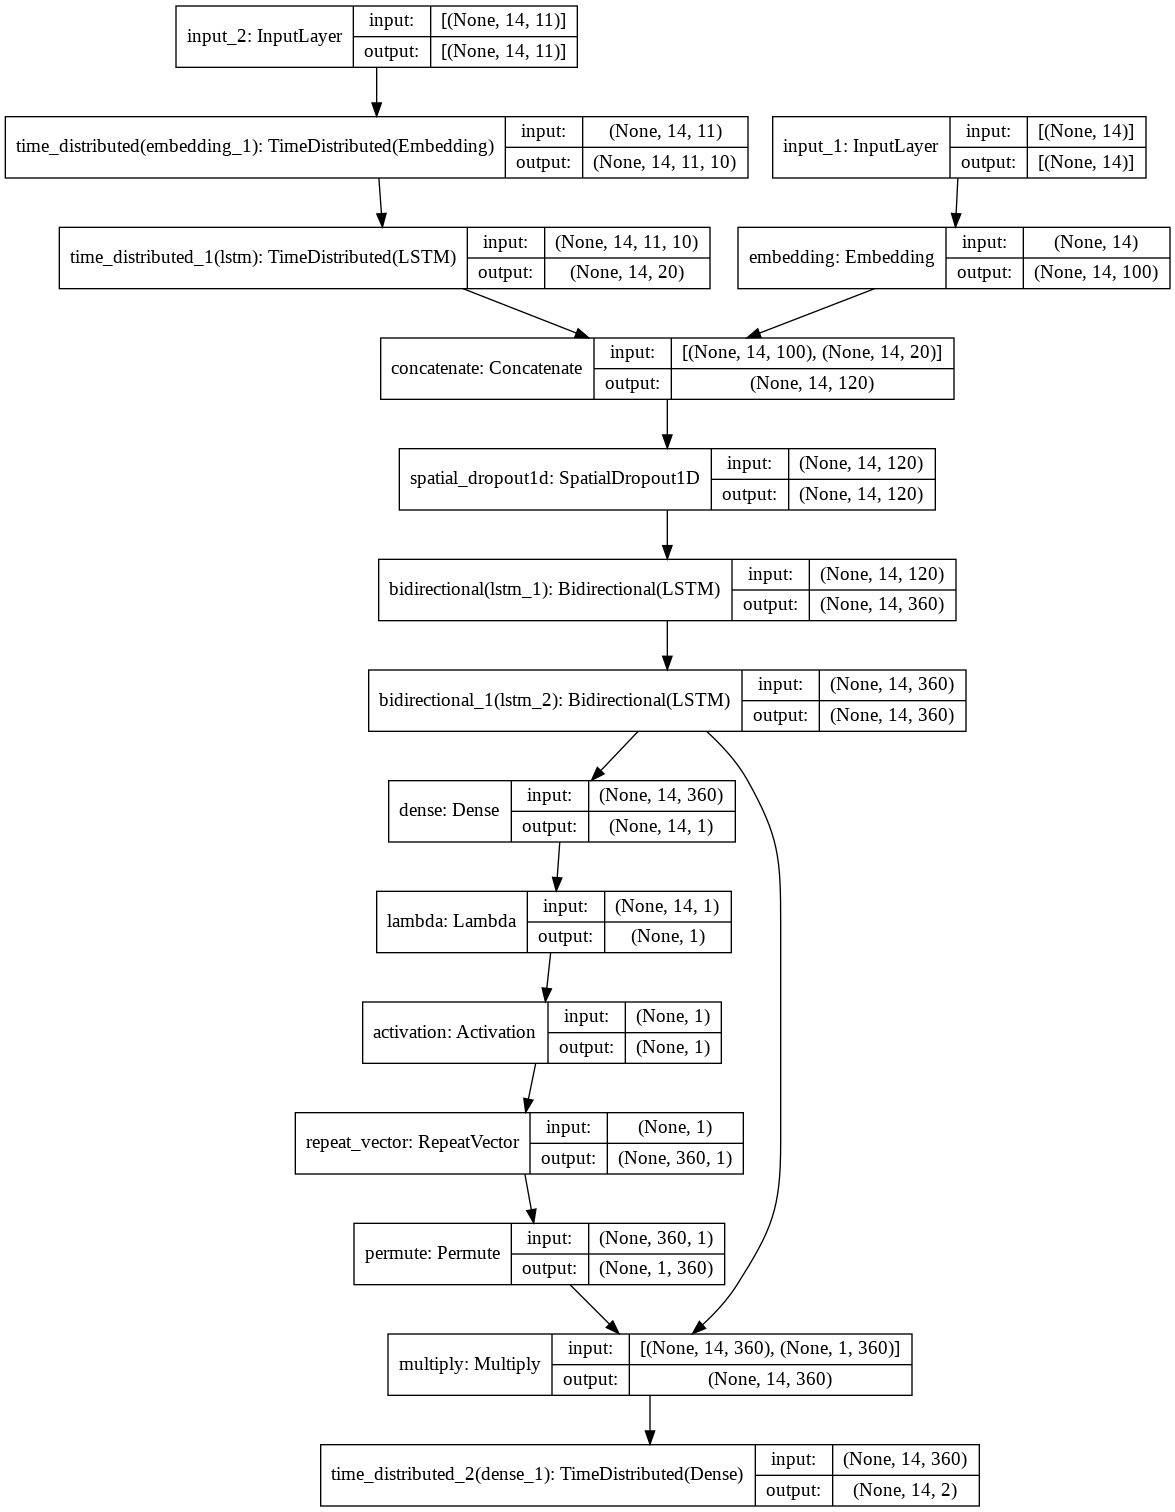

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 14, 11)]     0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, 14, 11, 10)   540         input_2[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 14, 100)      39000       input_1[0][0]                    
______________________________________________________________________________________________

In [39]:
#history = model.fit(X_tr, np.array(y_tr), batch_size=32,callbacks=[f1score], epochs=2, validation_split=0.18, verbose=1)
batch_size = 32
epochs = 200
history = model.fit([X_word_train, np.array(X_char_train).reshape((len(X_char_train), max_len, max_len_char))],np.array(y_train),
                    # validation_data=([X_word_val, np.array(X_char_val).reshape((len(X_char_val), max_len, max_len_char))],np.array(y_val)),
                    epochs = epochs,
                    batch_size = batch_size,
                    # callbacks=[f1_score],   
                    verbose=1)

Epoch 1/200
11/11 [==============================] - 54s 354ms/step - loss: 0.2367
Epoch 2/200
11/11 [==============================] - 4s 356ms/step - loss: 0.2209
Epoch 3/200
11/11 [==============================] - 4s 352ms/step - loss: 0.2116
Epoch 4/200
11/11 [==============================] - 4s 353ms/step - loss: 0.2066
Epoch 5/200
11/11 [==============================] - 4s 355ms/step - loss: 0.1742
Epoch 6/200
11/11 [==============================] - 4s 353ms/step - loss: 0.1599
Epoch 7/200
11/11 [==============================] - 4s 351ms/step - loss: 0.1512
Epoch 8/200
11/11 [==============================] - 4s 357ms/step - loss: 0.1436
Epoch 9/200
11/11 [==============================] - 4s 353ms/step - loss: 0.1458
Epoch 10/200
11/11 [==============================] - 4s 357ms/step - loss: 0.1417
Epoch 11/200
11/11 [==============================] - 4s 351ms/step - loss: 0.1378
Epoch 12/200
11/11 [==============================] - 4s 355ms/step - loss: 0.1378
Epoch 13/200

## **Evaluation and Model Saving:**

In [40]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict([X_word_test, np.array(X_char_test).reshape((len(X_char_test), max_len, max_len_char))], verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

3/3 [==============================] - 5s 68ms/step


In [41]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
model_score = "{:.1%}".format(f1_score(test_labels, pred_labels))
print(model_score)

95.9%


/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: TTC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


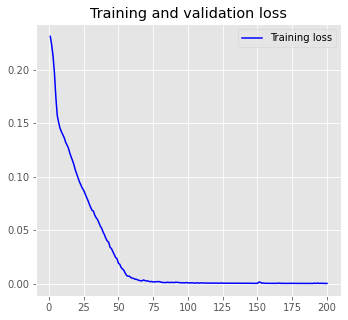

In [42]:
# Plot the graph 
plt.style.use('ggplot')
def plot_history(history):
    #accuracy = history.history[f1score]
    #val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    # val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    #plt.subplot(1, 2, 1)
    #plt.plot(x, accuracy, 'b', label='Training acc')
    #plt.plot(x, val_accuracy, 'r', label='Validation acc')
    #plt.title('Training and validation accuracy')
    #plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    # plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    # Save the loss curve figure as PNG.
    #plt.savefig(root_path + str(num_of_test) + emb_tech + data_set + str(model_score) + '_loss-curve.jpeg')
plot_history(history)

In [43]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score:" + model_score)
print("F1-score_summary: {:.1%}",classification_report(test_labels, pred_labels))

F1-score:95.9%
F1-score_summary: {:.1%}               precision    recall  f1-score   support

          TC       0.96      0.95      0.96        86

   micro avg       0.96      0.95      0.96        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.96      0.95      0.96        86



/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: TTC seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
